# Task 1
1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.\
    **Income is on the x-axis, life expectancy is on the y-axis, and it is colored by region, while the size of each point references population.**
2. Import q1data.csv dataset
3. Recreate the plot as best you can using plotnine
**See below**
4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Import q1data.csv dataset
import pandas as pd
import numpy as np

#First 5 rows of data from dataset
df1 = pd.read_excel(r'C:\Users\ryanc\Desktop\GSB_544\Data\q1data.xlsx')
df1.head()

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [5]:
from plotnine import ggplot, options, scale_size_area, annotate, labs, theme, geom_text, geom_point, aes, stat_smooth, facet_wrap, element_rect, scale_x_log10, ylab, xlab, theme_bw, theme_light, scale_y_continuous, scale_x_continuous, scale_fill_manual, guides
from plotnine import *
filtered1 = df1.dropna(subset=["income","life_exp","population","four_regions"]) #Removing empty values

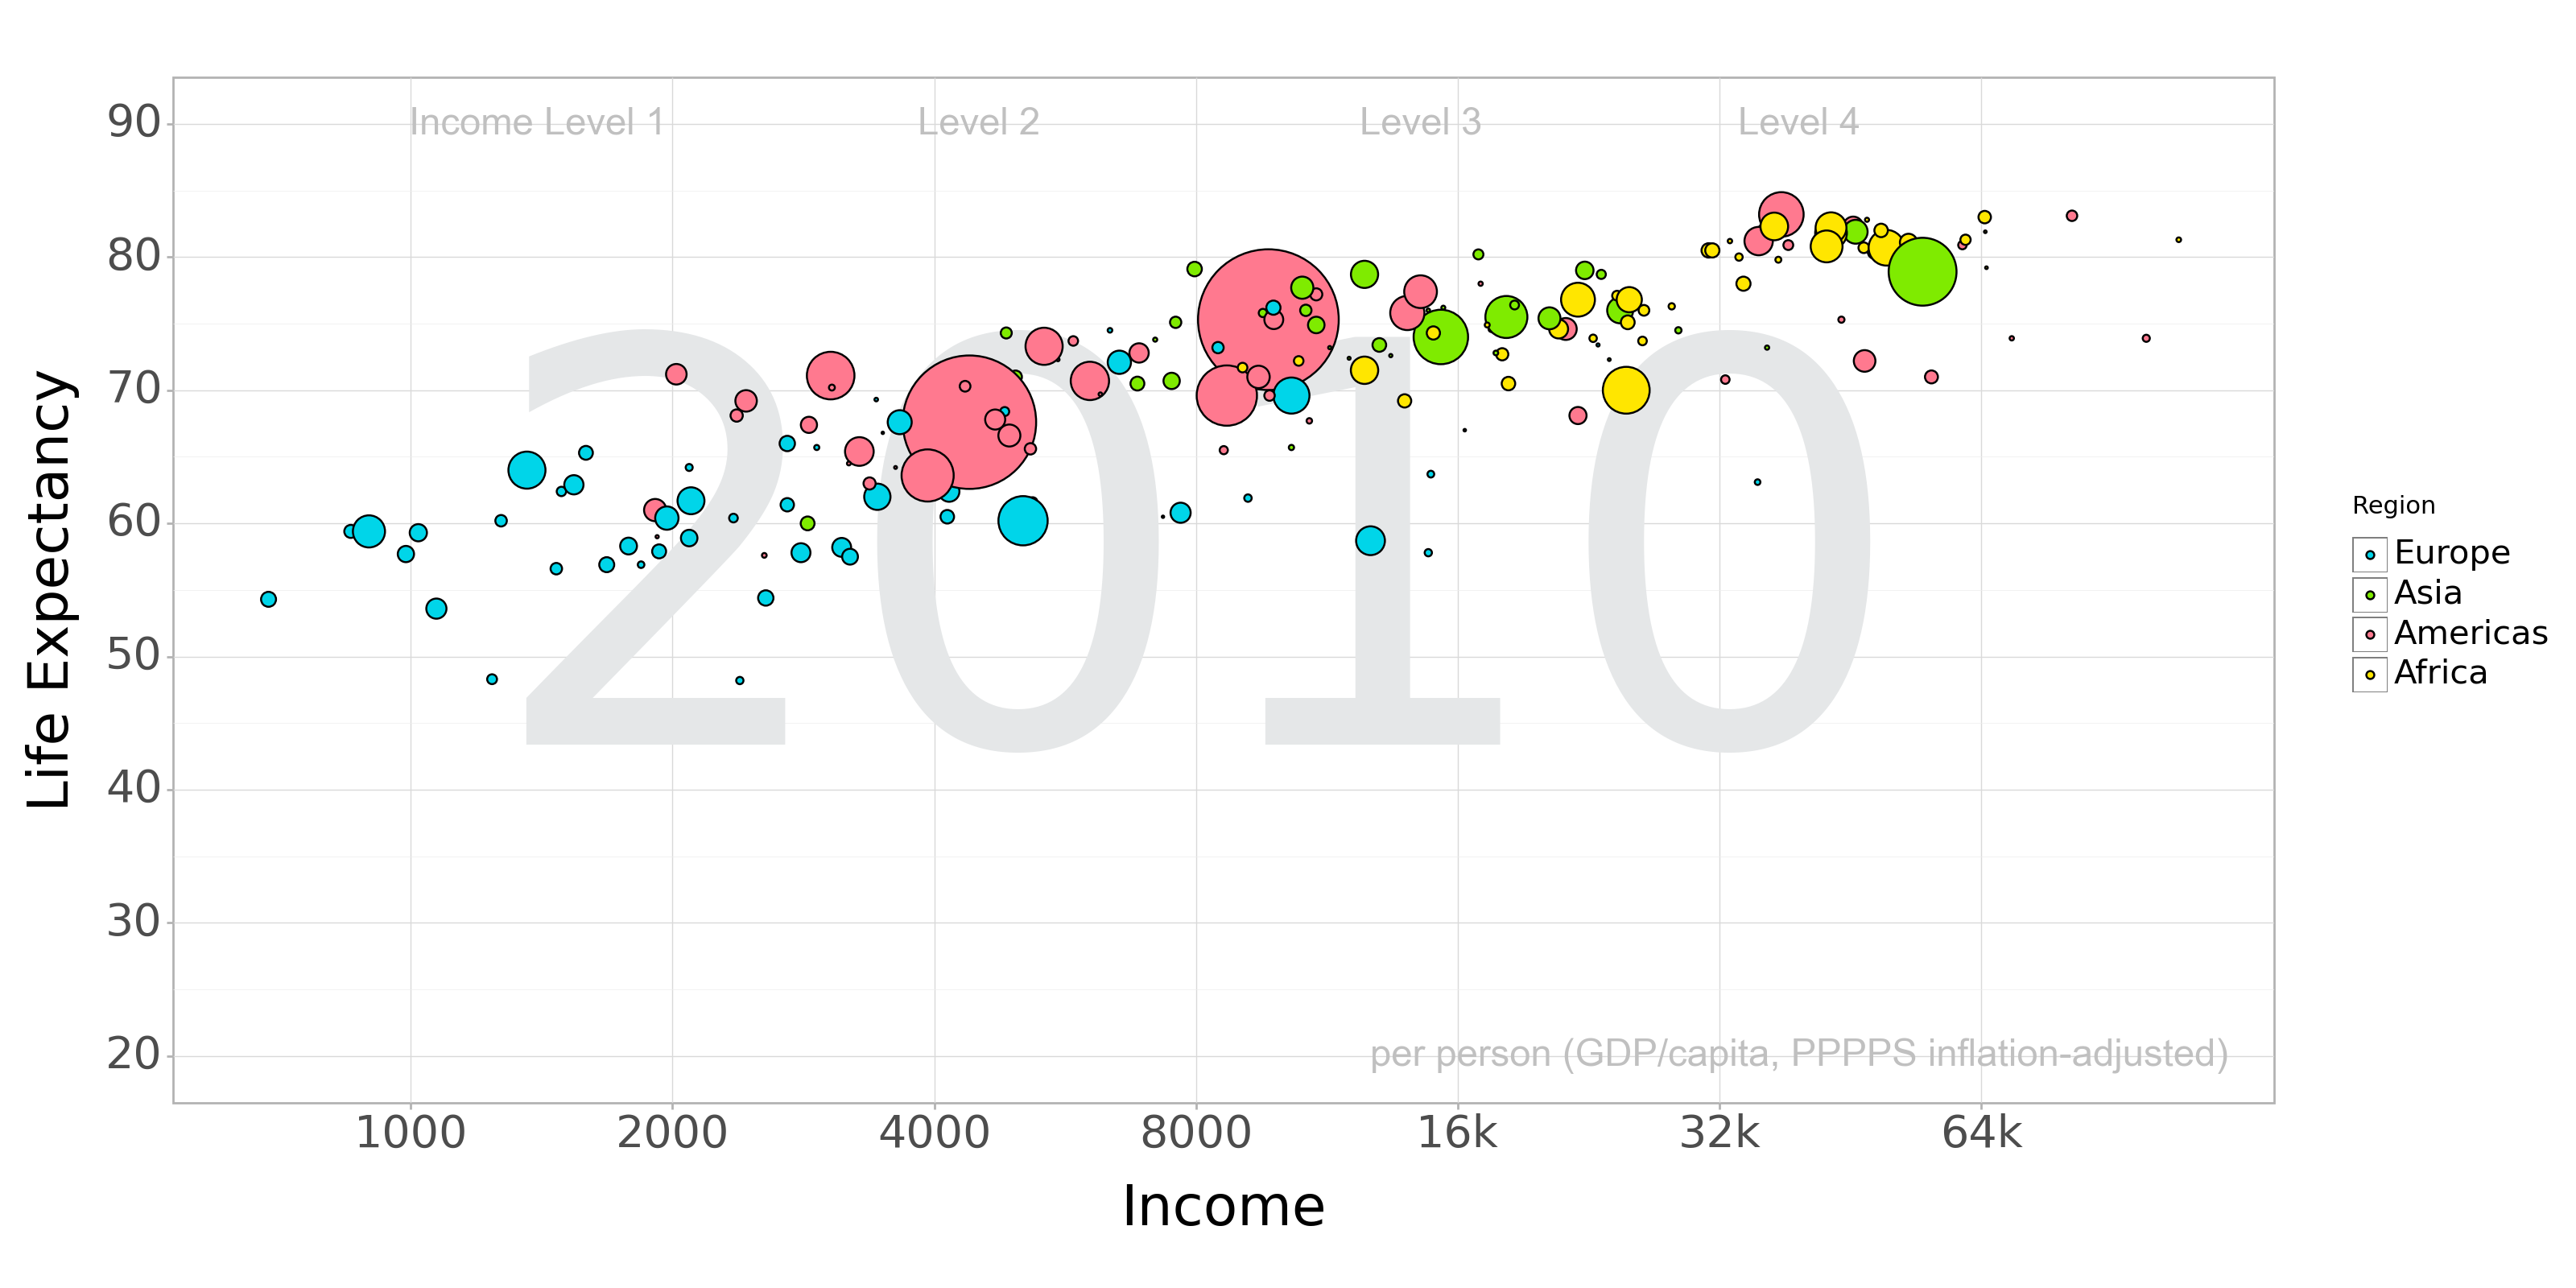

In [6]:
#Part 3: Recreate the plot from Task 1
options.figure_size = (16,8)
region_colors = {
    'europe': '#FFE600',
    'asia': '#FF798F',
    'americas': '#7FEB00',
    'africa': '#00D5E9'
}
custom_color_labels = ["Europe", "Asia", "Americas", "Africa"]

plot1 = (ggplot(filtered1, 
aes(
  x = "income",
  y = "life_exp",
  fill = "factor(four_regions)",
  size = "population"
))
+ annotate('text', x=8000, y=55, label='2010', color = '#E5E7E8', size=250, family="sans")
+ annotate('text', x=1400, y=90, label='Income Level 1', color = 'silver', size=17, family="Arial")
+ annotate('text', x=4500, y=90, label='Level 2', color = 'silver', size=17, family="Arial")
+ annotate('text', x=14500, y=90, label='Level 3', color = 'silver', size=17, family="Arial")
+ annotate('text', x=39500, y=90, label='Level 4', color = 'silver', size=17, family="Arial")
+ annotate('text', x=39500, y=20, label='per person (GDP/capita, PPPPS inflation-adjusted)', color = 'silver', size=17, family="Arial")
+ labs(x="Income", y="Life Expectancy", fill="Region")
+ scale_x_continuous(breaks=([500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]),
                    labels = [500, 1000, 2000, 4000, 8000, "16k", "32k", "64k"],
                    trans = 'log2')
+ scale_y_continuous(limits = (20, 90),
                   breaks = range(20,100,10))
+ geom_point()
+ scale_size_area(max_size=35)
+ theme_light()
+ scale_fill_manual(values=region_colors,labels=custom_color_labels)
+ guides(size=False)
+ theme(axis_text_x=element_text(size=15))
+ theme(legend_text=element_text(size=15))
+ theme(axis_text_x=element_text(size=20), axis_text_y=element_text(size=20))
+ theme(axis_title_x=element_text(size=25), axis_title_y=element_text(size=25))
)    
print(plot1)

# Task 2
1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.\
    **Exports is on the x-axis, with imports on the y-axis, while it is colored by region, and the size of dots is relative to the energy consumption**
2. Import q1data.csv dataset
3. Recreate the plot as best you can using plotnine\
**See below**
4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data.


In [88]:
#Importing dataset 2, first 5 rows below
df2 = pd.read_excel(r"C:\Users\ryanc\Desktop\GSB_544\Data\q2data.xlsx")
df2['energy'] = pd.to_numeric(df2['energy'], errors = 'coerce')
df2.head()

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427.0,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825.0,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434.0,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


In [95]:
#Removing empty cells
filtered2 = df2.dropna(subset=["exports","imports","energy","four_regions"])

C:\Users\ryanc\anaconda3\Lib\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 33 rows containing missing values.


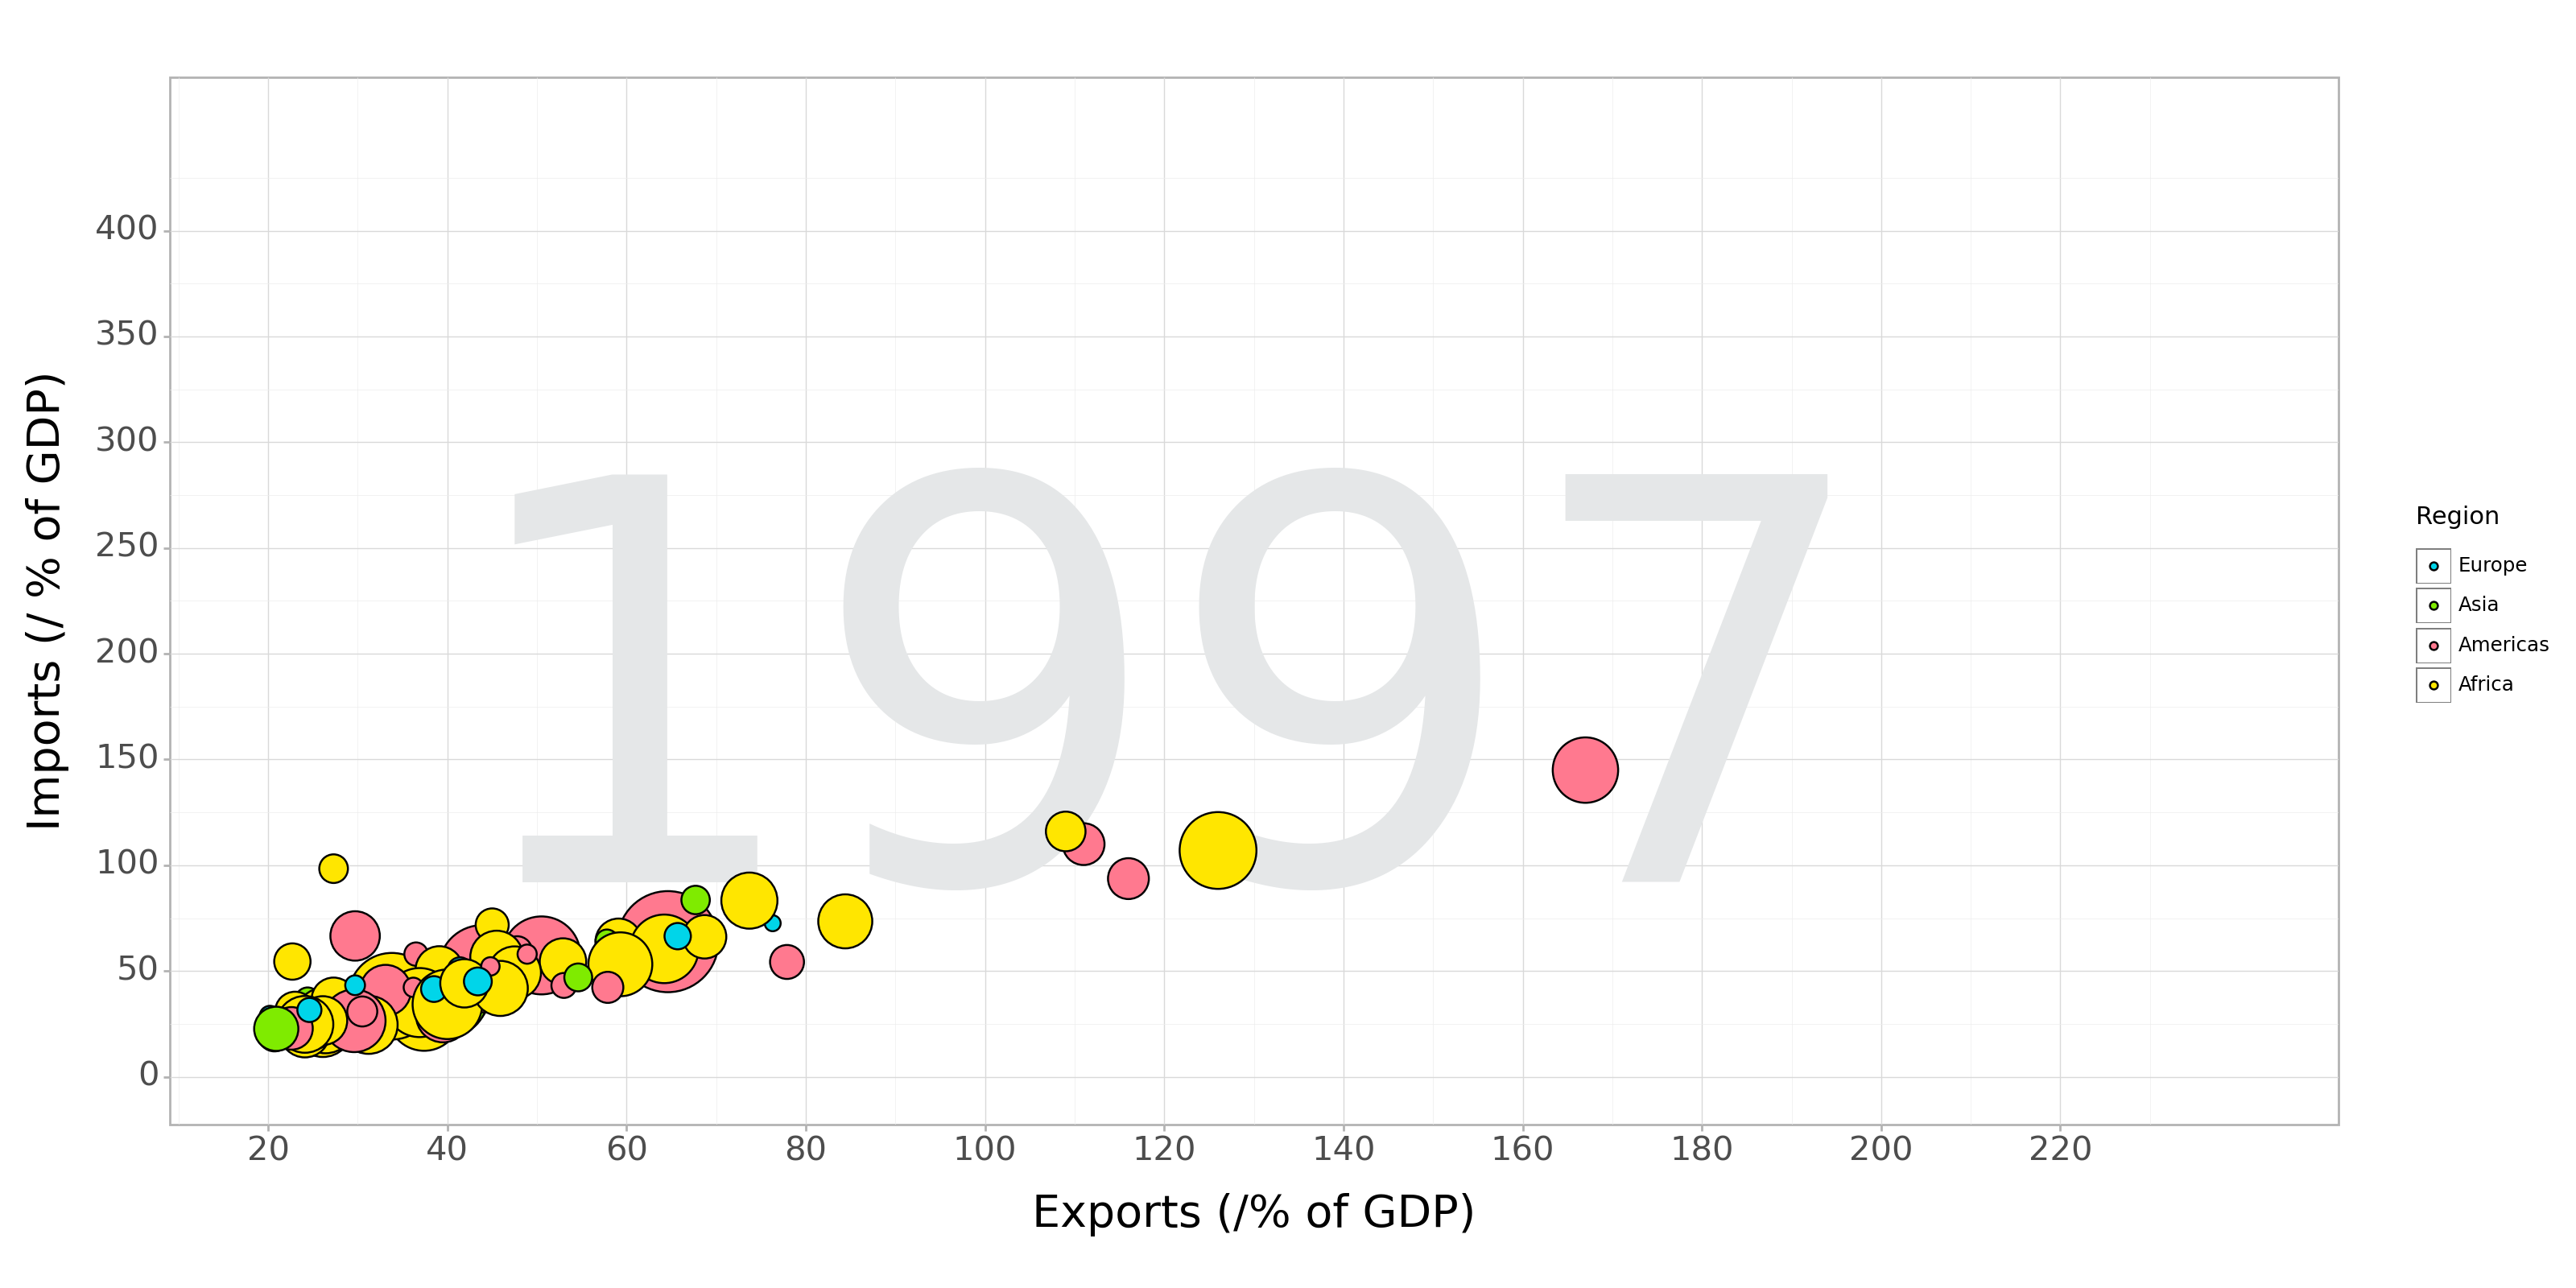

In [102]:
#Part 3: Recreate the plot from Task 2
options.figure_size = (16,8)
region_colors = {
    'europe': '#FFE600',
    'asia': '#FF798F',
    'americas': '#7FEB00',
    'africa': '#00D5E9'
}
custom_color_labels = ["Europe", "Asia", "Americas", "Africa"]

plot2 = (ggplot(filtered2, 
aes(
  x = "exports",
  y = "imports",
  fill = "factor(four_regions)",
  size = "energy"
))
+ labs(x="Exports (/% of GDP)", y="Imports (/ % of GDP)", fill="Region")
+ annotate('text', x=120, y=165, label='1997', color = '#E5E7E8', size=250, family="sans")
+ scale_x_continuous(limits = (20, 240),
                     breaks = range(20,240,20))
+ scale_y_continuous(limits = (0, 450),
                   breaks = range(0,450,50))
+ guides(size=False)
+ geom_point()
+ theme_light()
+ theme(axis_text_x=element_text(size=15), axis_text_y=element_text(size=15))
+ theme(axis_title_x=element_text(size=20), axis_title_y=element_text(size=20))
+ scale_size_area(max_size=25)
+ scale_fill_manual(values=region_colors,labels=custom_color_labels)
)    
print(plot2)

# Task 3
1. Identify, and list here, what aesthetics are being used and which variables are being mapped to each aesthetic.\
 **Internet users is represented on the x-axis, with GDP per capita on the y-axis, while it is colored by region, and the size of dots is relative to Income**
2. Import q1data.csv dataset
3. Recreate the plot as best you can using plotnine\
**See below**
4. What other geometries could you use here besides geom_point? Provide an actual plot of another geometry being used here and why it's good or bad for visualizing these data.


In [92]:
#Importing dataset 3, first 5 rows below
df3 = pd.read_excel(r"C:\Users\ryanc\Desktop\GSB_544\Data\q3data.xlsx")
df3.head()

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia


In [94]:
filtered3 = df3.dropna(subset=["internet_users","gdp","income","four_regions"])

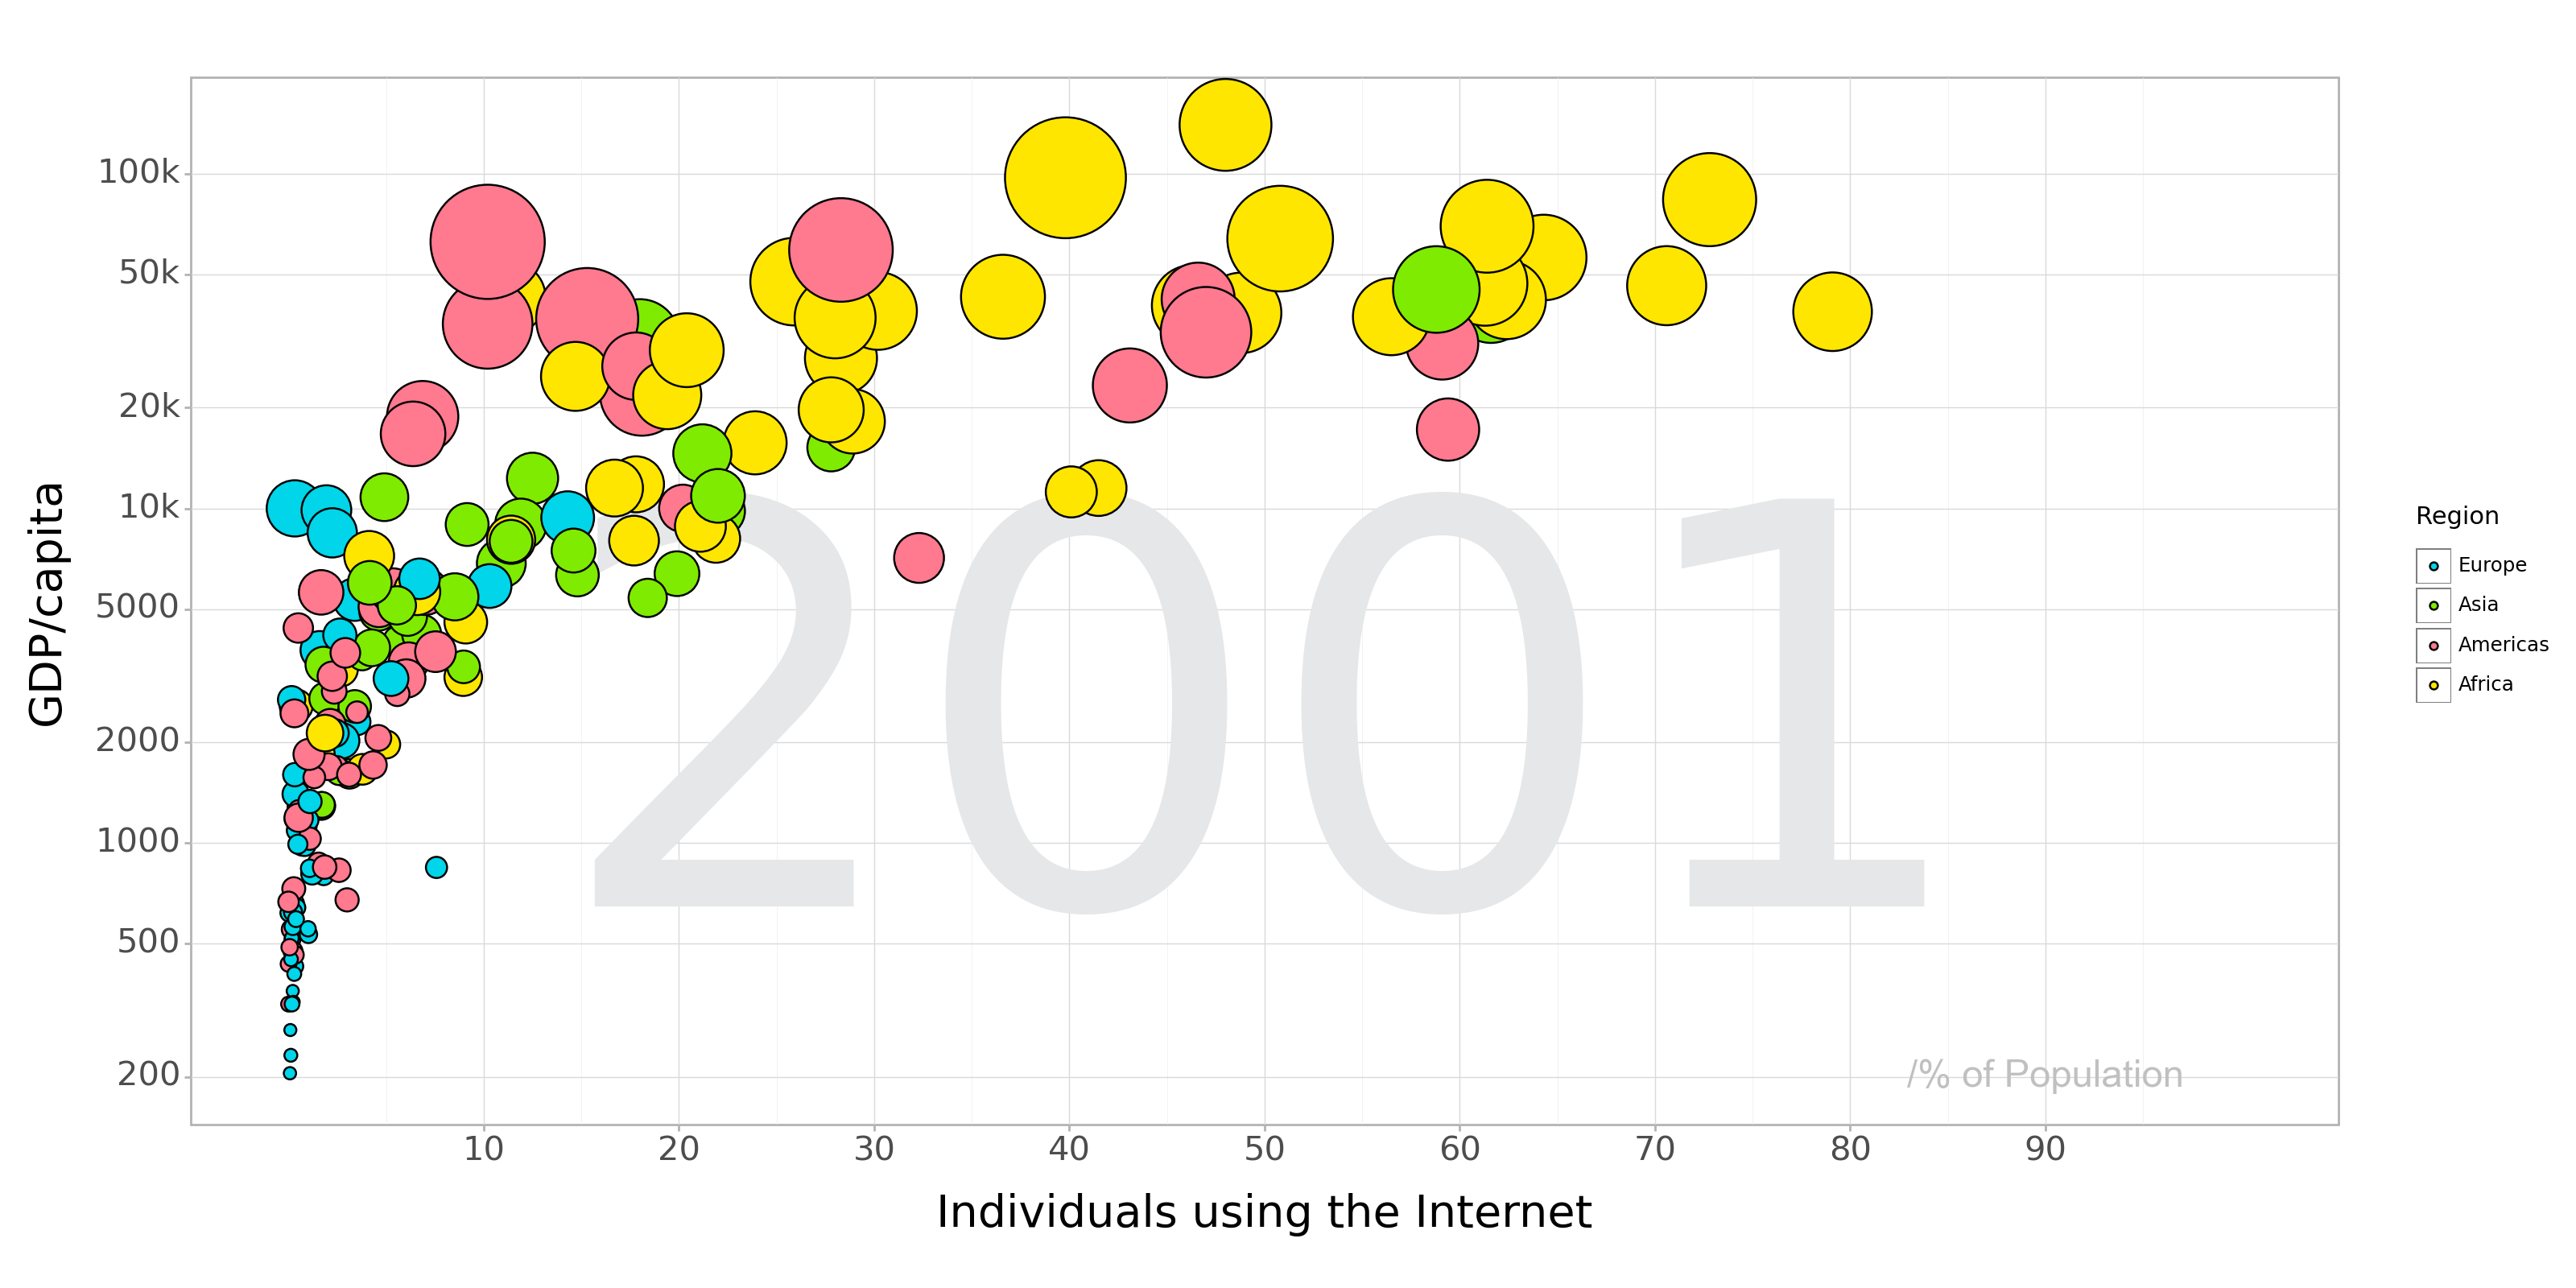

In [129]:
#Part 3: Recreate the plot from Task 3
region_colors = {
    'europe': '#FFE600',
    'asia': '#FF798F',
    'americas': '#7FEB00',
    'africa': '#00D5E9'
}
custom_color_labels = ["Europe", "Asia", "Americas", "Africa"]

plot2 = (ggplot(filtered3, 
aes(
  x = "internet_users",
  y = "gdp",
  fill = "factor(four_regions)",
  size = "income"
))
+ annotate('text', x=50, y=1875, label='2001', color = '#E5E7E8', size=250, family="sans")
+ annotate('text', x=90, y=200, label='/% of Population', color = 'silver', size=17, family="Arial")
+ labs(x="Individuals using the Internet", y="GDP/capita", fill="Region")
+ scale_y_continuous(breaks=([200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000]),
                    labels = [200, 500, 1000, 2000, 5000, "10k", "20k", "50k", "100k"],
                    trans = 'log2')
+ scale_x_continuous(limits = (0, 100),
                     breaks = range(10,100,10))
+ guides(size=False)
+ geom_point()
+ theme_light()
+ theme(axis_text_x=element_text(size=15), axis_text_y=element_text(size=15))
+ theme(axis_title_x=element_text(size=20), axis_title_y=element_text(size=20))
+ scale_size_area(max_size=30)
+ scale_fill_manual(values=region_colors,labels=custom_color_labels)
)    
print(plot2)